# 1. Library Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 2. Exploraory Data Analysis & Pre Processing

### Loading Data set

In [ ]:
print("Loading datasets...")
print("Loading categories dataset...")
dataset_categories = pd.read_csv('../data/raw/amazon_categories.csv', header=0)
print("Categories dataset loaded. ✔")
print("Loading products dataset...")
dataset_products = pd.read_csv('../data/amazon_products.csv', header=0)
print("Products dataset loaded. ✔")
print("Datasets loaded successfully. ✔✔")

Loading datasets...
Loading categories dataset...
Categories dataset loaded. ✔
Loading products dataset...
Products dataset loaded. ✔
Datasets loaded successfully. ✔✔


### Veiwing Dataset

In [5]:
print(dataset_categories.head())
print(dataset_products.head())

   id                     category_name
0   1          Beading & Jewelry Making
1   2                 Fabric Decorating
2   3       Knitting & Crochet Supplies
3   4              Printmaking Supplies
4   5  Scrapbooking & Stamping Supplies
         asin                                              title  \
0  B014TMV5YE  Sion Softside Expandable Roller Luggage, Black...   
1  B07GDLCQXV  Luggage Sets Expandable PC+ABS Durable Suitcas...   
2  B07XSCCZYG  Platinum Elite Softside Expandable Checked Lug...   
3  B08MVFKGJM  Freeform Hardside Expandable with Double Spinn...   
4  B01DJLKZBA  Winfield 2 Hardside Expandable Luggage with Sp...   

                                              imgUrl  \
0  https://m.media-amazon.com/images/I/815dLQKYIY...   
1  https://m.media-amazon.com/images/I/81bQlm7vf6...   
2  https://m.media-amazon.com/images/I/71EA35zvJB...   
3  https://m.media-amazon.com/images/I/91k6NYLQyI...   
4  https://m.media-amazon.com/images/I/61NJoaZcP9...   

              

In [6]:
print("Number of Categories:", len(dataset_categories['category_name'].unique()))

Number of Categories: 248


### Removing Null Values

In [7]:
print(dataset_products.info())
print("Number of Products:", len(dataset_products))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426337 entries, 0 to 1426336
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   asin               1426337 non-null  object 
 1   title              1426336 non-null  object 
 2   imgUrl             1426337 non-null  object 
 3   productURL         1426337 non-null  object 
 4   stars              1426337 non-null  float64
 5   reviews            1426337 non-null  int64  
 6   price              1426337 non-null  float64
 7   listPrice          1426337 non-null  float64
 8   category_id        1426337 non-null  int64  
 9   isBestSeller       1426337 non-null  bool   
 10  boughtInLastMonth  1426337 non-null  int64  
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 110.2+ MB
None
Number of Products: 1426337


In [8]:
dataset_products.dropna(inplace=True)
print("Number of Products after dropping NA:", len(dataset_products))

Number of Products after dropping NA: 1426336


In [9]:
print(dataset_products.describe())

              stars       reviews         price     listPrice   category_id  \
count  1.426336e+06  1.426336e+06  1.426336e+06  1.426336e+06  1.426336e+06   
mean   3.999511e+00  1.807509e+02  4.337541e+01  1.244917e+01  1.237410e+02   
std    1.344293e+00  1.761454e+03  1.302893e+02  4.611200e+01  7.311271e+01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00   
25%    4.100000e+00  0.000000e+00  1.199000e+01  0.000000e+00  6.500000e+01   
50%    4.400000e+00  0.000000e+00  1.995000e+01  0.000000e+00  1.200000e+02   
75%    4.600000e+00  0.000000e+00  3.599000e+01  0.000000e+00  1.760000e+02   
max    5.000000e+00  3.465630e+05  1.973181e+04  9.999900e+02  2.700000e+02   

       boughtInLastMonth  
count       1.426336e+06  
mean        1.419824e+02  
std         8.362722e+02  
min         0.000000e+00  
25%         0.000000e+00  
50%         0.000000e+00  
75%         5.000000e+01  
max         1.000000e+05  


In [11]:
# Check for duplicates
print(dataset_categories['category_name'].duplicated().sum())

0


## Visuals

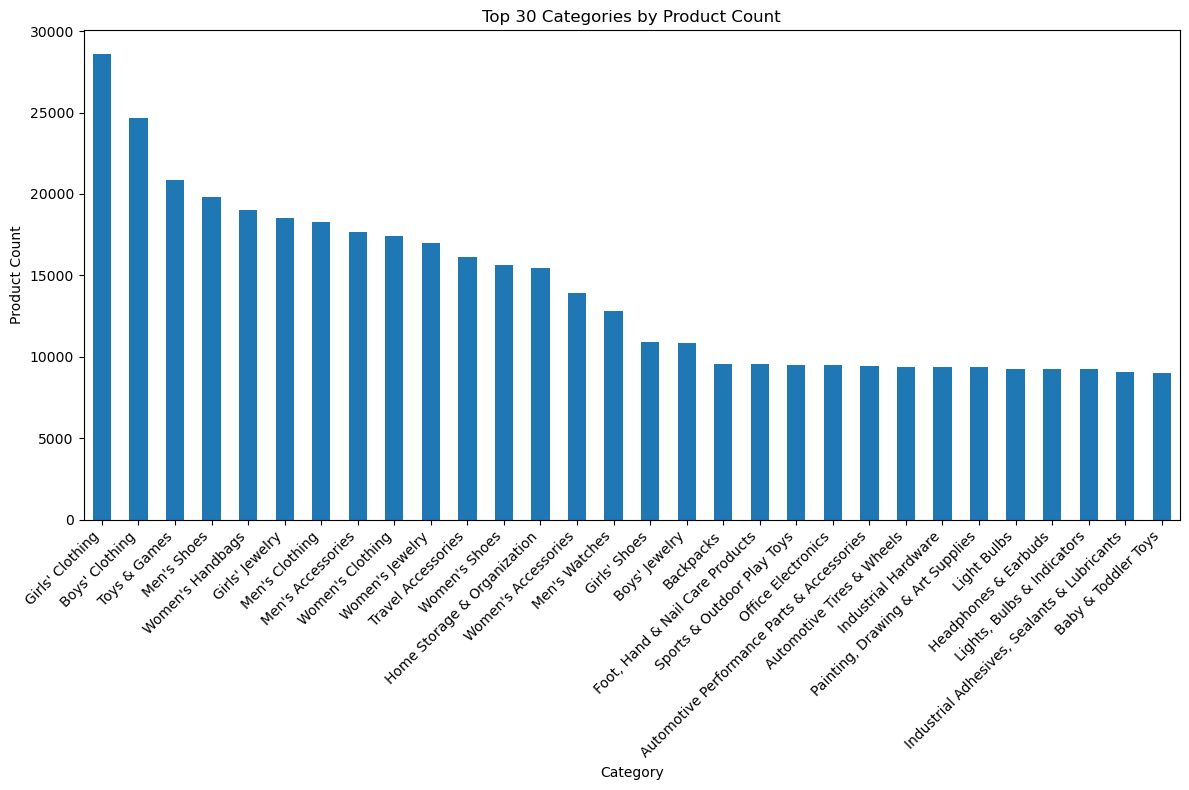

In [13]:


# count products per category id and map to category names
mapping = dataset_categories.set_index('id')['category_name']
counts = dataset_products['category_id'].value_counts().rename_axis('category_id').reset_index(name='count')
counts['category_name'] = counts['category_id'].map(mapping)

# plot top 30 categories for readability
top = counts.sort_values('count', ascending=False).head(30).set_index('category_name')

plt.figure(figsize=(12,8))
top['count'].plot(kind='bar')
plt.title('Top 30 Categories by Product Count')
plt.ylabel('Product Count')
plt.xlabel('Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

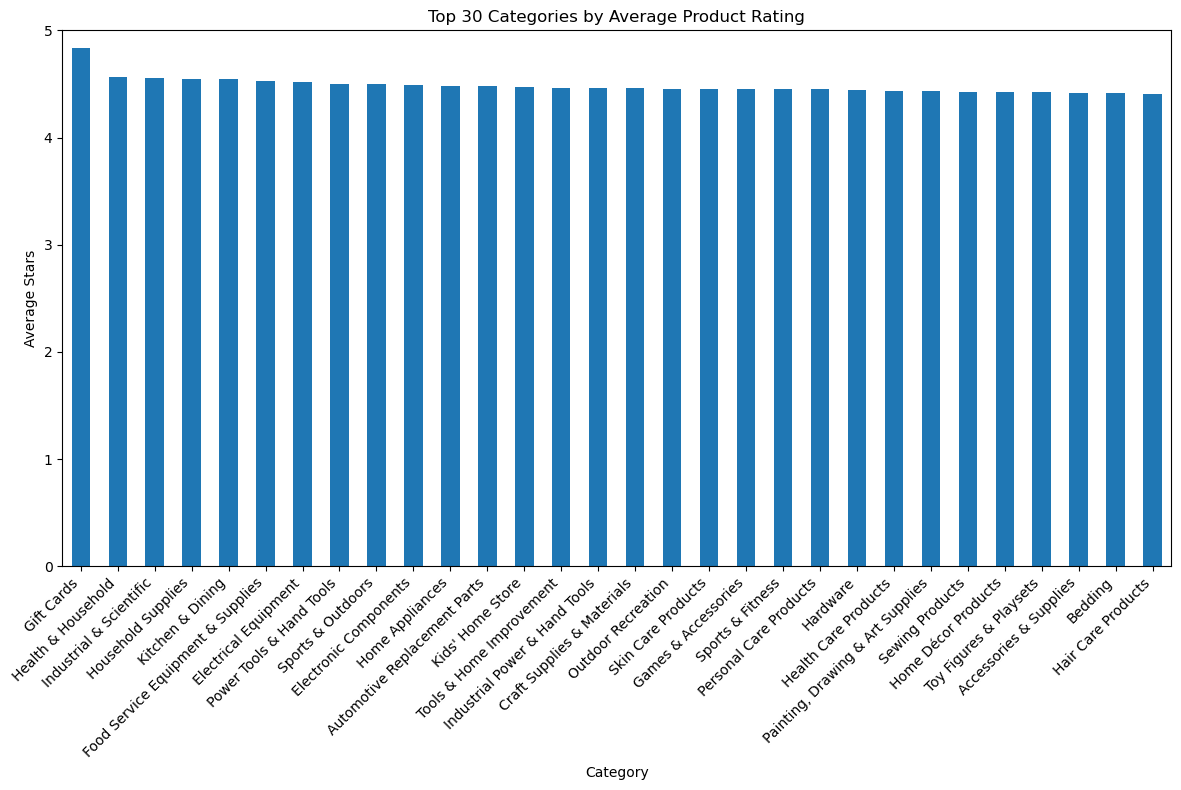

In [19]:
# plot top 30 categories by average rating
df_plot = avg_sorted.sort_values('avg_stars', ascending=False).head(30).copy()
if 'category_name' in df_plot.columns:
    df_plot = df_plot.set_index('category_name')

plt.figure(figsize=(12,8))
df_plot['avg_stars'].plot(kind='bar')
plt.title('Top 30 Categories by Average Product Rating')
plt.ylabel('Average Stars')
plt.xlabel('Category')
plt.ylim(0, 5)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
full_data_size = len(dataset_products)
targe_data_size = 100000
split_size = targe_data_size / full_data_size
dump, dataset_products_xs = train_test_split(dataset_products, test_size = split_size, random_state=42, stratify=dataset_products['category_id'])

In [36]:
dump = None  # Free up memory
print("Extra small dataset created with", len(dataset_products_xs), "products.")
print(dataset_products_xs.describe())
print(dataset_products_xs.info())

Extra small dataset created with 100000 products.
               stars        reviews          price      listPrice  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        3.996632     168.777850      43.517592      12.407261   
std         1.349742    1420.943486     127.849816      45.519608   
min         0.000000       0.000000       0.000000       0.000000   
25%         4.100000       0.000000      11.990000       0.000000   
50%         4.500000       0.000000      19.950000       0.000000   
75%         4.600000       0.000000      35.990000       0.000000   
max         5.000000  111665.000000   12629.660000     999.990000   

         category_id  boughtInLastMonth  
count  100000.000000      100000.000000  
mean      123.746570         140.061500  
std        73.115194         779.378968  
min         1.000000           0.000000  
25%        65.000000           0.000000  
50%       120.000000           0.000000  
75%       176.000000          50.0

In [ ]:
# Save the extra small dataset
dataset_products_xs.to_csv('../data/amazon_products_cleaned.csv', index=False)

In [38]:
print(dataset_products[dataset_products['isBestSeller'] == True].count())

asin                 8520
title                8520
imgUrl               8520
productURL           8520
stars                8520
reviews              8520
price                8520
listPrice            8520
category_id          8520
isBestSeller         8520
boughtInLastMonth    8520
dtype: int64


In [39]:
dataset_products_xs[dataset_products_xs['isBestSeller'] == True].count()

asin                 548
title                548
imgUrl               548
productURL           548
stars                548
reviews              548
price                548
listPrice            548
category_id          548
isBestSeller         548
boughtInLastMonth    548
dtype: int64